In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
df = pd.read_csv('selected_data.csv')
df.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),63.300,62.751,62.201,61.646,61.089,60.527,59.965,...,44.613,43.577,42.566,41.579,40.617,39.681,38.771,37.888,37.031,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672,12.458,12.248,12.040,11.836,11.634,11.436,...,8.751,8.623,8.497,8.373,8.251,8.130,8.009,7.889,7.771,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),32.850,33.122,33.394,33.668,33.943,34.219,34.496,...,36.836,36.888,36.915,36.918,36.897,36.851,36.781,36.687,36.569,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),14.597,14.715,14.843,14.972,15.102,15.233,15.364,...,14.498,14.398,14.299,14.200,14.096,13.988,13.876,13.759,13.638,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),37.311,37.583,37.856,38.130,38.404,38.680,38.955,...,42.664,42.474,42.285,42.095,41.906,41.703,41.485,41.252,41.005,Austria


#### Wypełnienie brakujących danych średnią

In [3]:
def fill_missing_with_mean(data):
    """
    Uzupełnia brakujące wartości w danych średnią z pozostałych wartości w danej kolumnie.

    Parametry:
    - data: DataFrame zawierający dane

    Zwraca:
    DataFrame z uzupełnionymi brakującymi wartościami.
    """
    filled_data = data.copy()
    
    for col in filled_data.columns:
        if filled_data[col].isnull().any():
            filled_data[col].fillna(filled_data[col].mean(), inplace=True)
    return filled_data

In [4]:
df_filled = fill_missing_with_mean(df)
df_filled.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),63.300,62.751,62.201,61.646,61.089,60.527,59.965,...,44.613,43.577,42.566,41.579,40.617,39.681,38.771,37.888,37.031,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),12.672,12.458,12.248,12.040,11.836,11.634,11.436,...,8.751,8.623,8.497,8.373,8.251,8.130,8.009,7.889,7.771,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),32.850,33.122,33.394,33.668,33.943,34.219,34.496,...,36.836,36.888,36.915,36.918,36.897,36.851,36.781,36.687,36.569,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),14.597,14.715,14.843,14.972,15.102,15.233,15.364,...,14.498,14.398,14.299,14.200,14.096,13.988,13.876,13.759,13.638,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),37.311,37.583,37.856,38.130,38.404,38.680,38.955,...,42.664,42.474,42.285,42.095,41.906,41.703,41.485,41.252,41.005,Austria


#### Przeskalowanie danych 

In [5]:
def min_max_scaling_by_specific_category(data):
    """
    Przeprowadza min-max scaling danych dla wszystkich kategorii szczegółowych.

    Parametry:
    - data: DataFrame zawierający dane, z kategoriami ogólną i szczegółową w trzeciej i czwartej kolumnie

    Zwraca:
    DataFrame z przeskalowanymi danymi.
    """
    # Tworzymy kopię danych, aby uniknąć zmiany oryginalnych danych
    scaled_df = data.copy()
    
    # Pobieramy unikalne kategorie ogólne
    general_categories = scaled_df['Category Name'].unique()
    
    scaler = MinMaxScaler()
    for general_category in general_categories:
        # Sprawdzamy, jakie kategorie szczegółowe zawierają daną kategorię ogólną
        specific_categories = scaled_df.loc[scaled_df['Category Name'] == general_category, 'Indicator Name'].unique()
        for specific_category in specific_categories:
            # Wybieramy dane dla danej kategorii ogólnej i wybranej kategorii szczegółowej
            selected_data = scaled_df[(scaled_df['Category Name'] == general_category) & (scaled_df['Indicator Name'] == specific_category)]
            # Wybieramy tylko kolumny numeryczne do skalowania
            numeric_cols = selected_data.select_dtypes(include=['float64', 'int64']).columns
            data_to_scale = selected_data[numeric_cols]
            # Przeprowadzamy skalowanie
            if len(data_to_scale.columns) > 0:
                scaled_data = scaler.fit_transform(data_to_scale)
                scaled_df.loc[selected_data.index, numeric_cols] = scaled_data
    
    return scaled_df



In [6]:
df_scaled = min_max_scaling_by_specific_category(df_filled)
df_scaled.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Country Name
0,ALB,agriculture_rural_development,Rural population (% of total population),0.676680,0.672119,0.667557,0.662960,0.658365,0.653724,0.649098,...,0.503999,0.493936,0.484134,0.474581,0.465290,0.456271,0.447526,0.439067,0.430884,Albania
1,ARG,agriculture_rural_development,Rural population (% of total population),0.135464,0.133436,0.131449,0.129482,0.127558,0.125653,0.123790,...,0.098861,0.097740,0.096642,0.095569,0.094520,0.093483,0.092446,0.091422,0.090421,Argentina
2,ARM,agriculture_rural_development,Rural population (% of total population),0.351168,0.354766,0.358393,0.362076,0.365808,0.369584,0.373406,...,0.416141,0.418118,0.419861,0.421381,0.422675,0.423731,0.424556,0.425149,0.425508,Armenia
3,AUS,agriculture_rural_development,Rural population (% of total population),0.156043,0.157611,0.159299,0.161013,0.162756,0.164525,0.166309,...,0.163786,0.163198,0.162633,0.162078,0.161477,0.160841,0.160168,0.159447,0.158688,Australia
4,AUT,agriculture_rural_development,Rural population (% of total population),0.398856,0.402547,0.406281,0.410062,0.413885,0.417765,0.421673,...,0.481981,0.481434,0.480938,0.480471,0.480056,0.479521,0.478854,0.478051,0.477124,Austria


#### Dodanie kolumny ze średnią z wartością w latach 1991-2021

In [7]:
selected_columns = df_scaled.loc[:,"1991":"2021"]
row_mean = selected_columns.mean(axis=1)
df_scaled['Mean'] = row_mean
df_scaled.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Country Name,Mean
0,ALB,agriculture_rural_development,Rural population (% of total population),0.676680,0.672119,0.667557,0.662960,0.658365,0.653724,0.649098,...,0.493936,0.484134,0.474581,0.465290,0.456271,0.447526,0.439067,0.430884,Albania,0.568331
1,ARG,agriculture_rural_development,Rural population (% of total population),0.135464,0.133436,0.131449,0.129482,0.127558,0.125653,0.123790,...,0.097740,0.096642,0.095569,0.094520,0.093483,0.092446,0.091422,0.090421,Argentina,0.110087
2,ARM,agriculture_rural_development,Rural population (% of total population),0.351168,0.354766,0.358393,0.362076,0.365808,0.369584,0.373406,...,0.418118,0.419861,0.421381,0.422675,0.423731,0.424556,0.425149,0.425508,Armenia,0.396526
3,AUS,agriculture_rural_development,Rural population (% of total population),0.156043,0.157611,0.159299,0.161013,0.162756,0.164525,0.166309,...,0.163198,0.162633,0.162078,0.161477,0.160841,0.160168,0.159447,0.158688,Australia,0.165043
4,AUT,agriculture_rural_development,Rural population (% of total population),0.398856,0.402547,0.406281,0.410062,0.413885,0.417765,0.421673,...,0.481434,0.480938,0.480471,0.480056,0.479521,0.478854,0.478051,0.477124,Austria,0.451969


In [8]:
select_columns = ['Country Name','Category Name','Indicator Name', 'Mean']
df_selected = df_scaled[select_columns]
df_selected

,Country Name,Category Name,Indicator Name,Mean
0,Albania,agriculture_rural_development,Rural population (% of total population),0.568331
1,Argentina,agriculture_rural_development,Rural population (% of total population),0.110087
2,Armenia,agriculture_rural_development,Rural population (% of total population),0.396526
3,Australia,agriculture_rural_development,Rural population (% of total population),0.165043
4,Austria,agriculture_rural_development,Rural population (% of total population),0.451969
...,...,...,...,...
12411,Ukraine,urban_developmen,Population density (people per sq. km of land ...,0.040046
12412,Uruguay,urban_developmen,Population density (people per sq. km of land ...,0.001652
12413,United States,urban_developmen,Population density (people per sq. km of land ...,0.003111
12414,South Africa,urban_developmen,Population density (people per sq. km of land ...,0.004066


#### Klastracja metodą KMeans

C:\Users\jkm07\AppData\Local\Temp\ipykernel_5368\3655537533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Category_Indicator'] = df_selected['Category Name'] + ' - ' + df_selected['Indicator Name']
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Category_Indicator  agriculture_rural_development - Employment in agriculture (% of total employment) (modeled ILO estimate)  \
Country Name                                                                                                                   
Albania                                                      0.509640                                                          
Algeria                                                      0.181177                                                          
Argentina                                                    0.107581                                                          
Armenia                                                      0.598510                                                          
Australia                                                    0.034290                                                          
...                                                               ...                                   

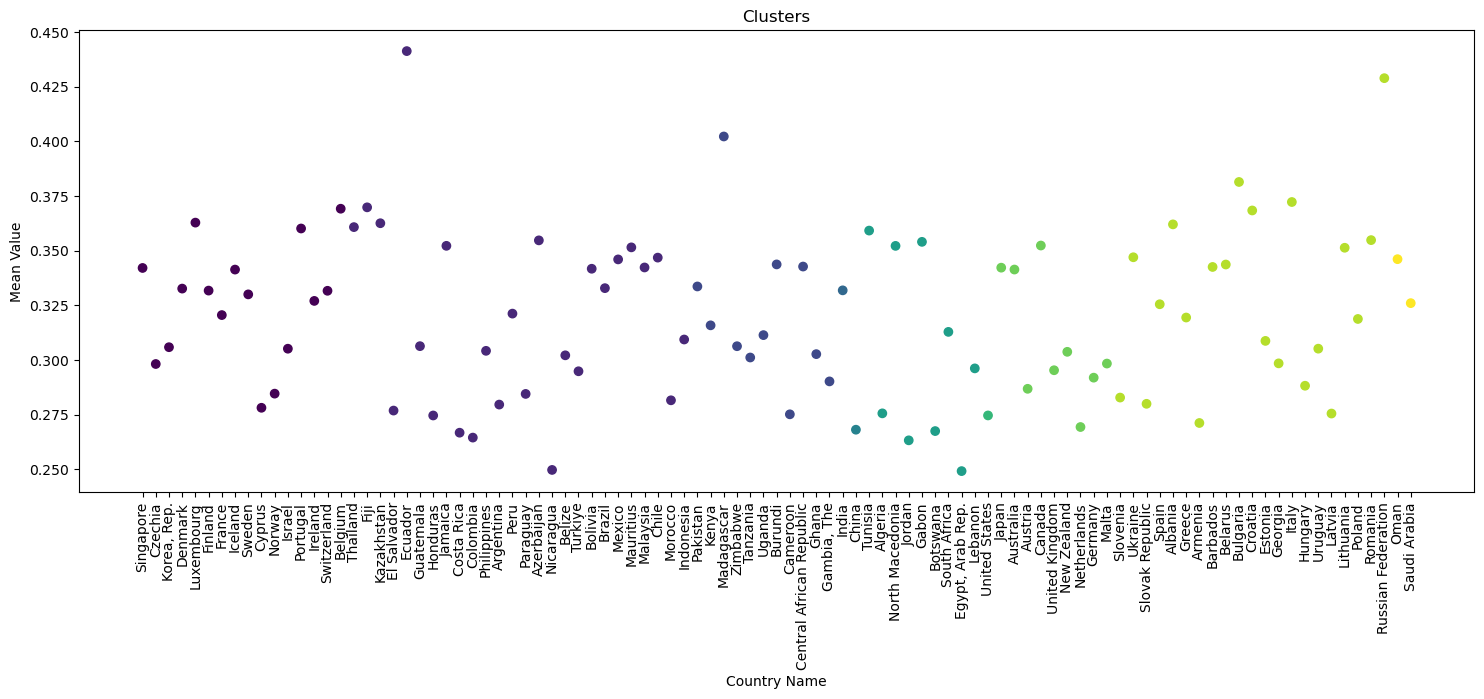

In [15]:
df_selected['Category_Indicator'] = df_selected['Category Name'] + ' - ' + df_selected['Indicator Name']

# Wybór cech do analizy
features = df_selected.pivot(index='Country Name', columns='Category_Indicator', values='Mean').fillna(0)

# Standaryzacja danych
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Utworzenie modelu KMeans
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)


# Dopasowanie modelu do danych
kmeans.fit(scaled_features)

# Dodanie etykiet klastrów do danych
features['Cluster'] = kmeans.labels_

# Wyświetlenie wyników
print(features)

#Srednia po krajach
mean_values = features.mean(axis=1)

# Wizualizacja klastrów
plt.figure(figsize=(18, 6))
features_sorted = features.sort_values('Cluster')
plt.scatter(features_sorted.index, mean_values, c=features_sorted['Cluster'], cmap='viridis')
plt.xlabel('Country Name')
plt.ylabel('Mean Value')
plt.title('Clusters')
plt.xticks(rotation=90)
plt.show()


#### Dendogram

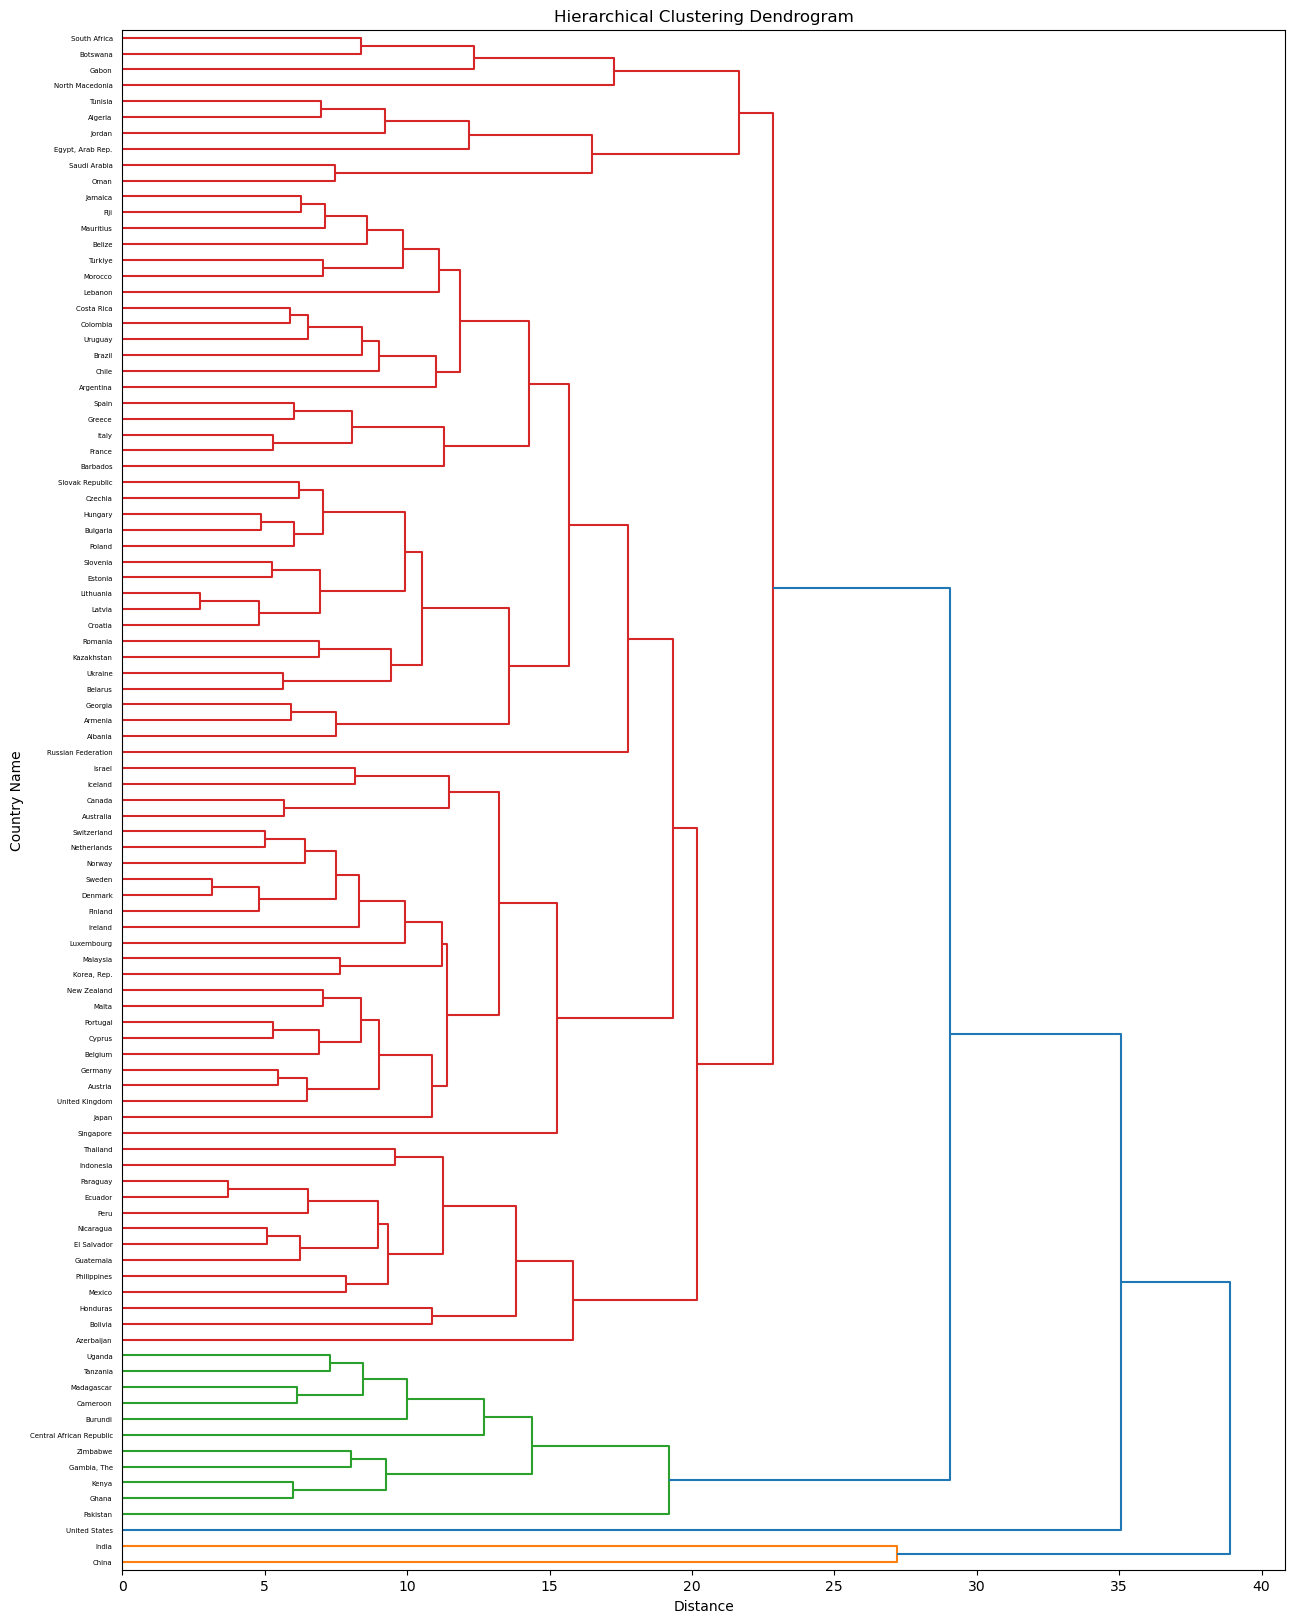

In [16]:

# Obliczanie macierzy odległości
distance_matrix = hierarchy.distance.pdist(scaled_features)

# Tworzenie dendrogramu
dendrogram = hierarchy.linkage(distance_matrix, method='complete')

# Wyświetlenie dendrogramu
plt.figure(figsize=(15, 20))
hierarchy.dendrogram(dendrogram, labels=features.index, leaf_rotation=00, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Country Name')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


#### Wizualizacja za pomocą TSNE

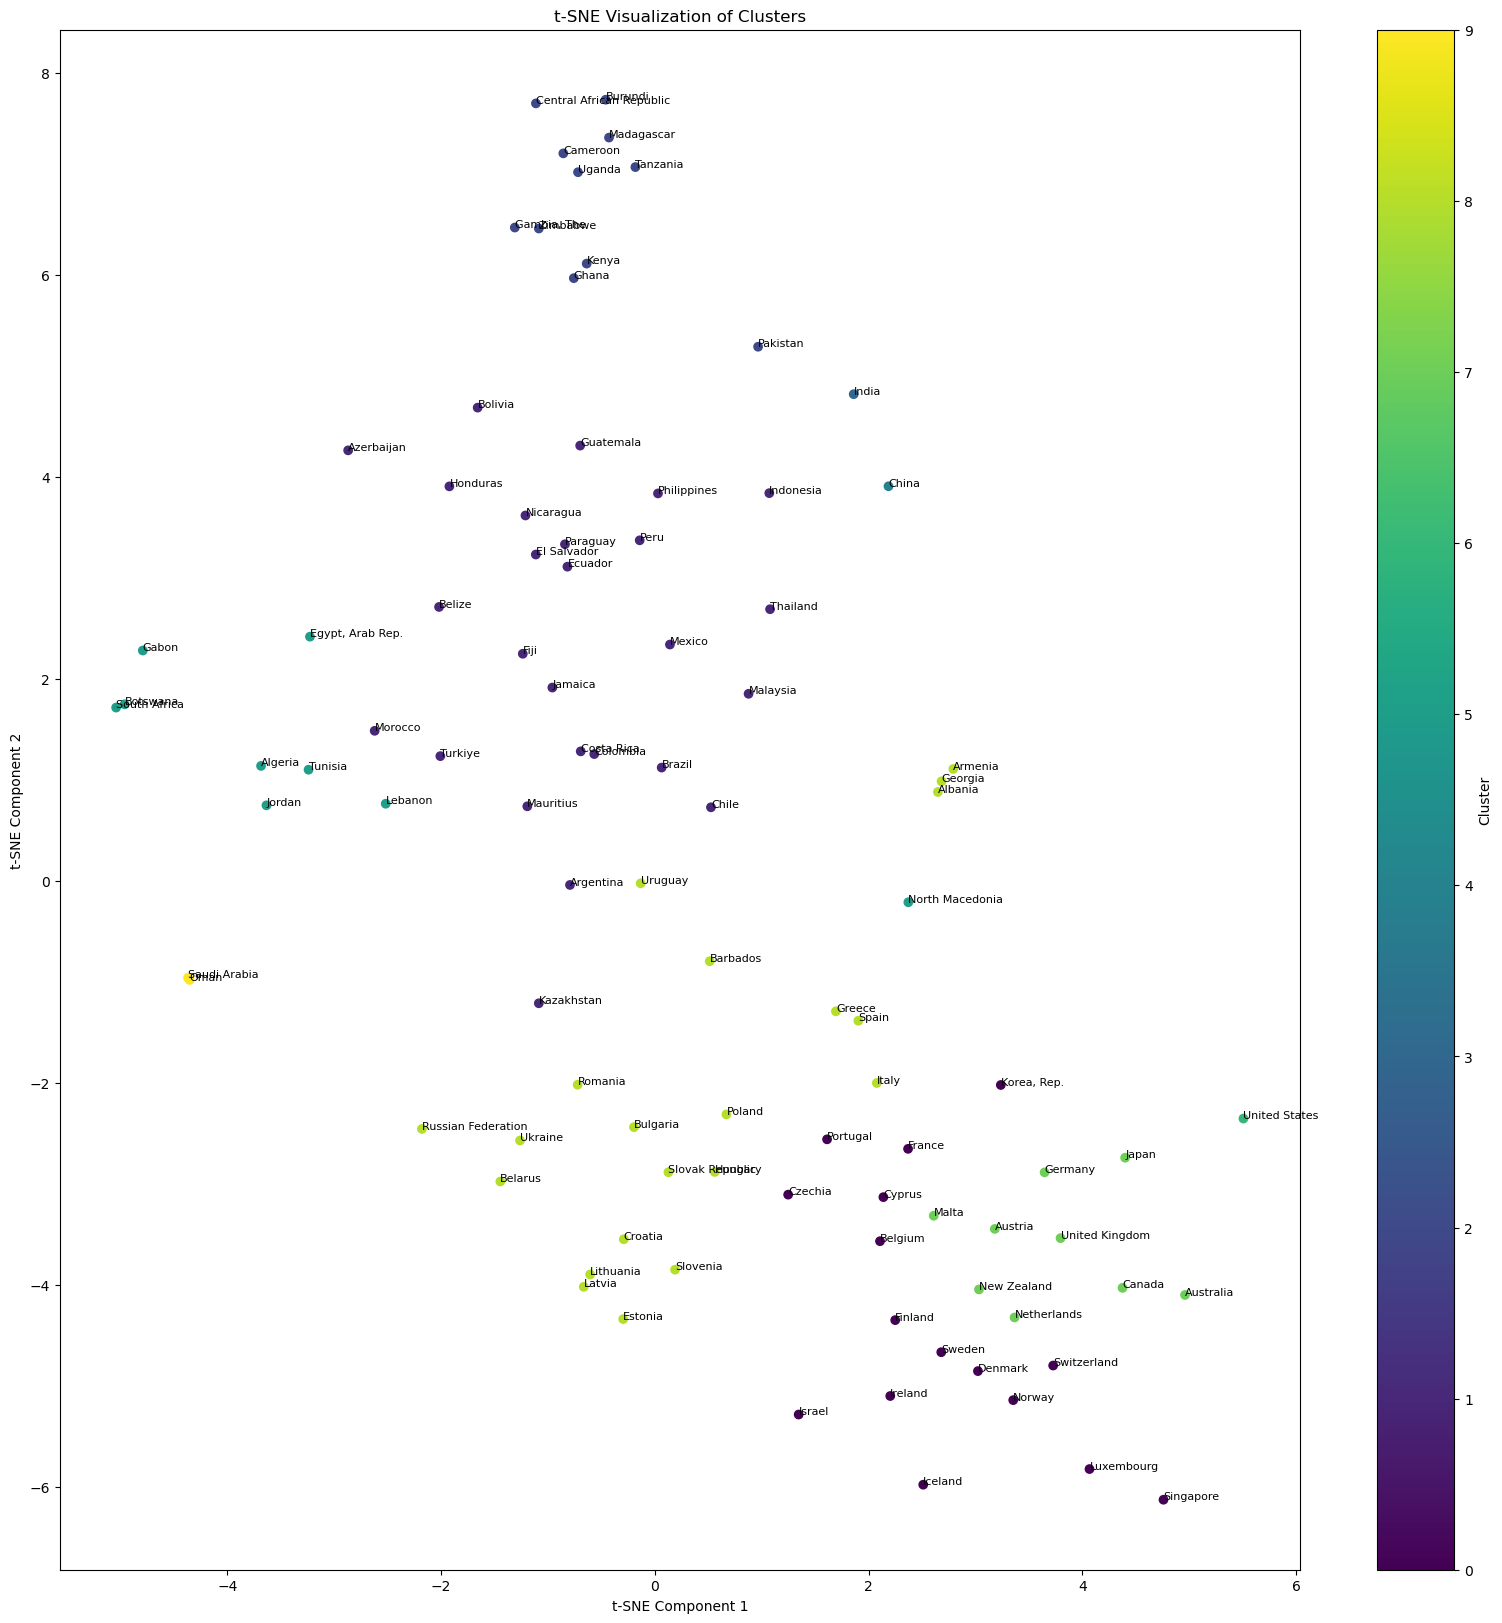

In [17]:
from sklearn.manifold import TSNE

# Redukcja wymiarów za pomocą t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Utworzenie wykresu
plt.figure(figsize=(20, 20))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=features['Cluster'], cmap='viridis')

# Dodanie adnotacji
for i, label in enumerate(features.index):
    plt.annotate(label, (tsne_features[i, 0], tsne_features[i, 1]), size=8)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


#### Wizualizacja na mapie świata

In [18]:

country_cluster = features['Cluster'].reset_index()


C:\Users\jkm07\AppData\Local\Temp\ipykernel_5368\247831421.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


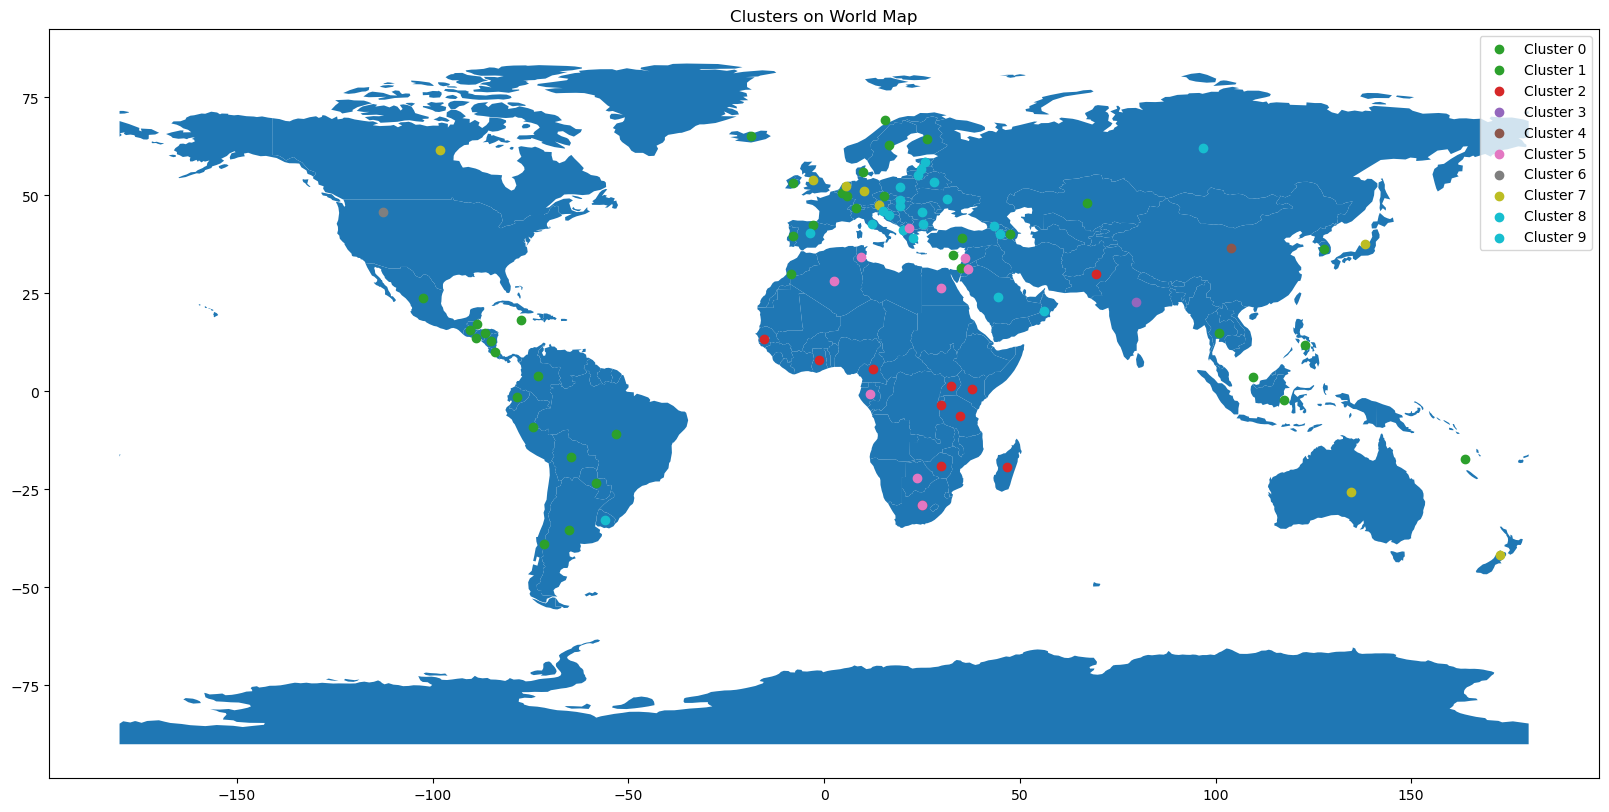

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import utlis.map_plot as map_plot
import numpy as np

# Wczytanie danych geograficznych krajów
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Zaktualizuj nazwy krajów w danych klastrów, aby pasowały do nazw w danych geograficznych
country_cluster['Country Name'] = map_plot.map_values_columns(country_cluster, 'Country Name')

# Połączenie danych geograficznych z danymi klastrów
world_clusters = world.merge(country_cluster, how='left', left_on='name', right_on='Country Name')

# Ustawienie rozmiaru mapy podczas wywoływania funkcji plot
fig, ax = plt.subplots(figsize=(20, 20))

# Wyświetlenie mapy świata
world.plot(ax=ax)

# Tworzenie słownika mapującego klastry na różne kolory
cluster_colors = plt.cm.tab10(np.linspace(0.2, 1, 10))

# Wstawianie punktów na mapie dla każdego kraju
for index, row in world_clusters.iterrows():
    # Wyświetl punkt tylko jeśli dla kraju są dostępne dane klastrów
    if not pd.isnull(row['Cluster']):
        # Tutaj uzyskaj współrzędne geograficzne dla danego kraju
        x = row.geometry.centroid.x
        y = row.geometry.centroid.y
        # Tutaj wyświetl punkt na mapie, gdzie kolor punktu zależy od klastra
        ax.scatter(x, y, color=cluster_colors[int(row['Cluster'])])

# Dodanie legendy do mapy
for cluster, color in enumerate(cluster_colors):
    ax.scatter([], [], color=color, label=f'Cluster {cluster}')

# Dodanie tytułu do mapy
ax.set_title('Clusters on World Map')
plt.legend()

# Wyświetlenie mapy
plt.show()


C:\Users\jkm07\AppData\Local\Temp\ipykernel_5368\3613269032.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


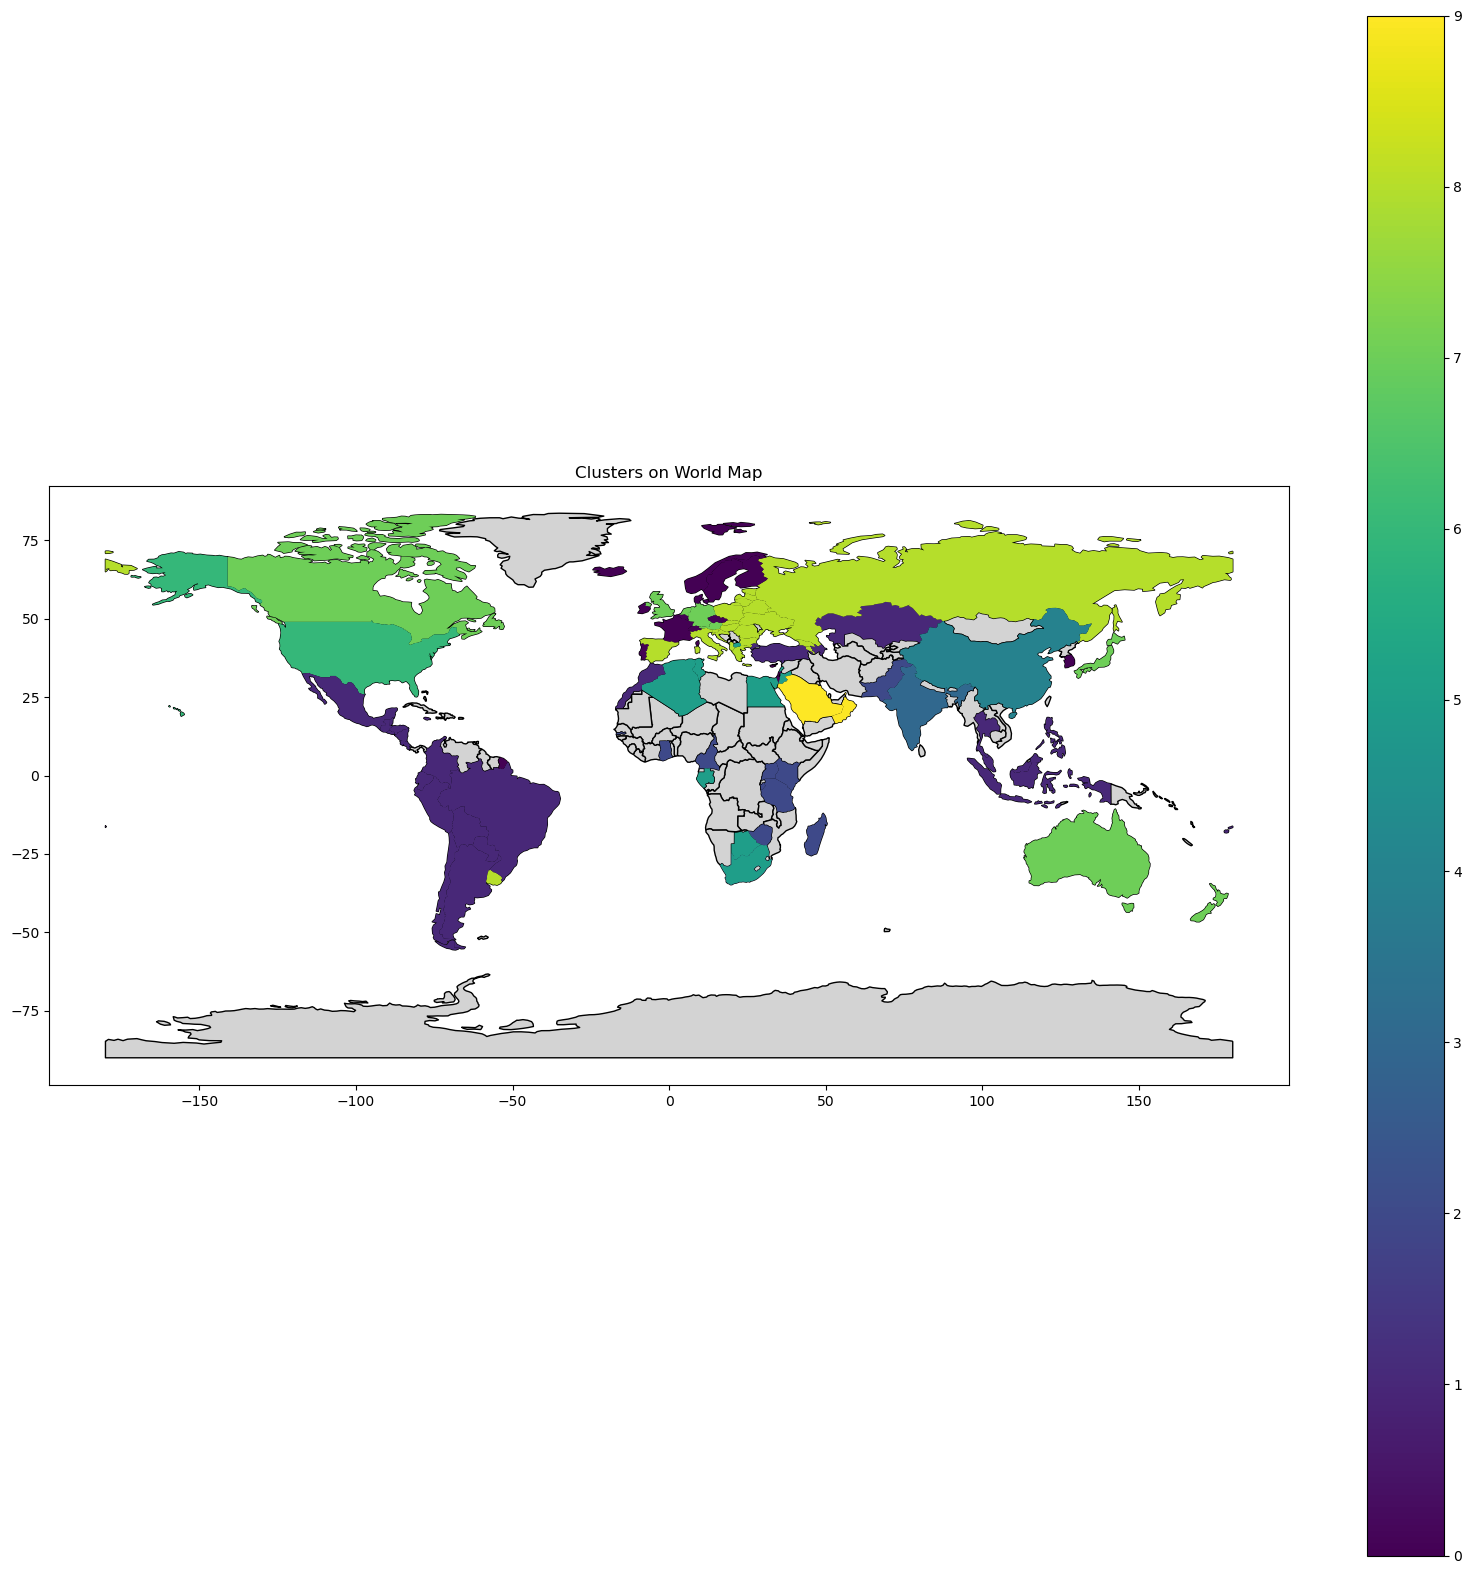

In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Wczytanie danych geograficznych krajów
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Zaktualizuj nazwy krajów w danych klastrów, aby pasowały do nazw w danych geograficznych
country_cluster['Country Name'] = map_plot.map_values_columns(country_cluster, 'Country Name')

# Połączenie danych geograficznych z danymi klastrów
world_clusters = world.merge(country_cluster, how='left', left_on='name', right_on='Country Name')

# Ustawienie rozmiaru mapy podczas wywoływania funkcji plot
fig, ax = plt.subplots(figsize=(20, 20))

# Wyświetlenie mapy świata
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Wstawianie kolorowych krajów na mapie dla każdego kraju
world_clusters.plot(column='Cluster', cmap='viridis', ax=ax, legend=True)

# Dodanie tytułu do mapy
ax.set_title('Clusters on World Map')

# Wyświetlenie mapy
plt.show()
